In [1]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt 

reconstruction_path = '/usr/local/micapollo01/MIC/DATA/STUDENTS/mvhave7/Results/Reconstructions/BaselineUNet/Epoch41/reconstructions/'
GT_path = '/usr/local/micapollo01/MIC/DATA/SHARED/NYU_FastMRI/multicoil_test_full/'
file = 'file_brain_AXT1_202_2020225.h5'

GT_path = os.path.join(GT_path,file)
reconstruction_path = os.path.join(reconstruction_path,file)

GT = h5py.File(GT_path,'r')
reconstruction = h5py.File(reconstruction_path,'r')


In [2]:
def calculate_R(filename):
    mask_path = '/usr/local/micapollo01/MIC/DATA/SHARED/NYU_FastMRI/multicoil_test/'
    mask = h5py.File(os.path.join(mask_path,filename),'r')
    nPE_mask = mask['mask'][()]
    sampled_columns = np.sum(nPE_mask)
    R = len(nPE_mask)/sampled_columns
    return R


In [3]:
GT = GT['reconstruction_rss']
reconstruction = reconstruction['reconstruction']


In [4]:
GT = np.array(GT)
reconstruction = np.array(reconstruction)


In [5]:
slice = 3


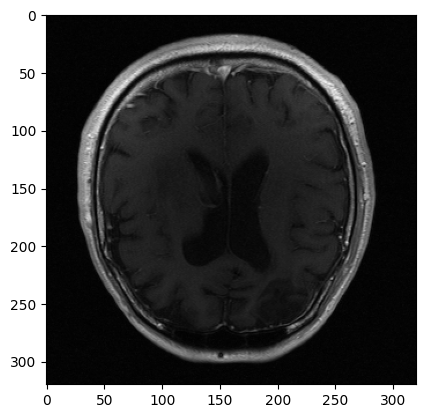

In [6]:
# Ground truth
plt.imshow(GT[slice,:,:],cmap='gray')


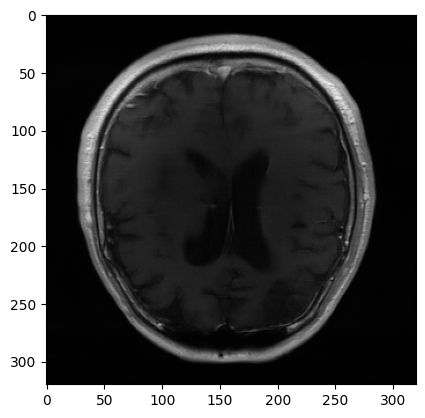

In [7]:
# Epoch 41
plt.imshow(reconstruction[slice,:,:],cmap='gray')


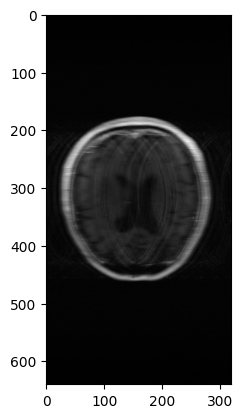

In [9]:
# View input of the model

input_path = '/usr/local/micapollo01/MIC/DATA/SHARED/NYU_FastMRI/multicoil_test/'
input_path = os.path.join(input_path,file)
input = h5py.File(input_path,'r')
input_kspace = input['kspace'][()]

import fastmri
from fastmri.data import transforms as T
input_kspace_T = T.to_tensor(input_kspace)    
sampled_image_T = fastmri.ifft2c(input_kspace_T)
sampled_image_abs = fastmri.complex_abs(sampled_image_T)
sampled_image_rss = fastmri.rss(sampled_image_abs, dim=1)

plt.imshow(np.abs(sampled_image_rss[slice,:,:].numpy()), cmap='gray')


In [ ]:
### TEST PERFORMANCE OF THE MODEL FOR R=8 EVEN THOUGH IT WAS TRAINED FOR R=4


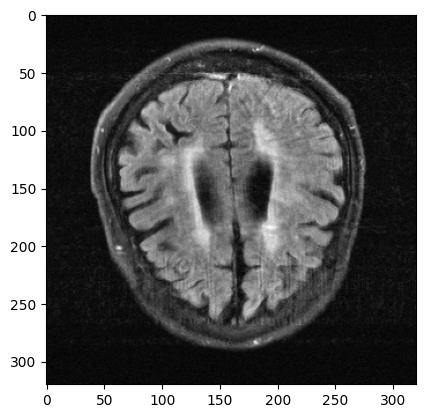

In [6]:
## AXFLAIR
# Ground truth
plt.imshow(GT[slice,:,:],cmap='gray')


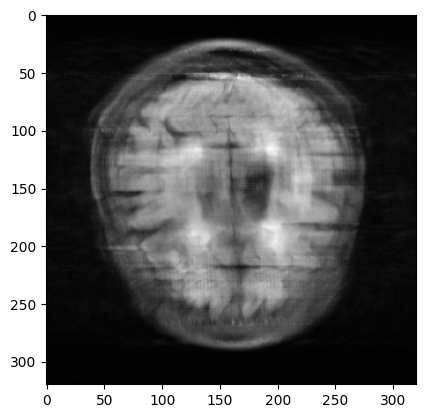

In [7]:
## AXFLAIR
# Epoch 41
plt.imshow(reconstruction[slice,:,:],cmap='gray')


In [8]:
# R
calculate_R(file)


8.0

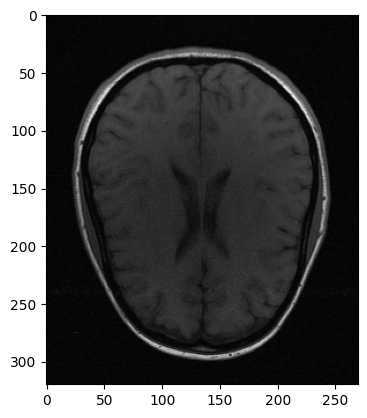

In [14]:
## T1
# Ground truth
plt.imshow(GT[slice,:,:],cmap='gray')


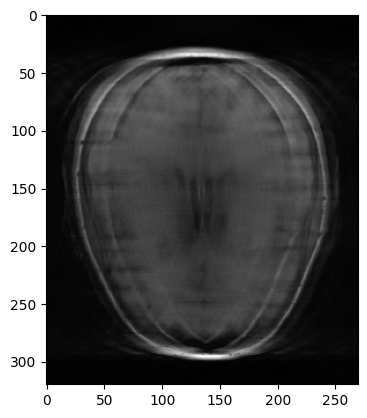

In [15]:
## T1
# Epoch 41
plt.imshow(reconstruction[slice,:,:],cmap='gray')


In [16]:
# R
calculate_R(file)


8.0

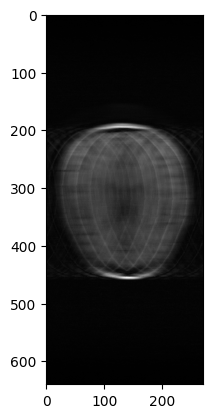

In [17]:
# View input of the model

input_path = '/usr/local/micapollo01/MIC/DATA/SHARED/NYU_FastMRI/multicoil_test/'
input_path = os.path.join(input_path,file)
input = h5py.File(input_path,'r')
input_kspace = input['kspace'][()]

import fastmri
from fastmri.data import transforms as T
input_kspace_T = T.to_tensor(input_kspace)    
sampled_image_T = fastmri.ifft2c(input_kspace_T)
sampled_image_abs = fastmri.complex_abs(sampled_image_T)
sampled_image_rss = fastmri.rss(sampled_image_abs, dim=1)

plt.imshow(np.abs(sampled_image_rss[slice,:,:].numpy()), cmap='gray')
